#**Uploading the data**

Mounting the drive to upload the data

In [36]:
from google.colab import drive
drive.mount("/content/drive")
!ls "drive/Shared drives/PMDL Project"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Data Preprocessing.ipynb'		     'Old Notebooks'
 Datasets				     'Pickles of the Final Models '
'Individual Program Brief Template.gslides'  'Project Wireframes.gslides'
 LSTM_with_exclamaition.pickle		     'Spam filter 2.zip'
 Models					     'Spam Filter.zip'


In [2]:
!pip install contractions

In [3]:
!pip install unidecode

In [4]:
!pip install nltk

In [5]:
!pip install keras

In [6]:
!pip install tensorflow

In [37]:
import zipfile
import pandas as pd
import contractions
import unidecode
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import pickle
from keras.preprocessing.text import Tokenizer

In [38]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# Load From Drive
zip_file_dir = "drive/Shared drives/PMDL Project"
with zipfile.ZipFile(zip_file_dir + "/Spam Filter.zip", 'r') as zip_ref:
    zip_ref.extractall(zip_file_dir + "/Datasets")

In [40]:
# Load From Local
with zipfile.ZipFile(zip_file_dir + "/Spam Filter.zip", 'r') as zip_ref:
    zip_ref.extractall(zip_file_dir + "/Datasets")

In [42]:
with zipfile.ZipFile(zip_file_dir + "/Spam filter 2.zip", 'r') as zip_ref:
    zip_ref.extractall(zip_file_dir + "/Datasets")

In [43]:
# Load from drive
dataset_dir = "drive/Shared drives/PMDL Project/Datasets"

dataset1 = pd.read_csv(dataset_dir + "/emails.csv", names=['text', 'spam'])
dataset1 = dataset1.drop(index=0)
dataset1 = dataset1.reset_index(drop=1)
dataset1.head

<bound method NDFrame.head of                                                    text spam
0     Subject: naturally irresistible your corporate...    1
1     Subject: the stock trading gunslinger  fanny i...    1
2     Subject: unbelievable new homes made easy  im ...    1
3     Subject: 4 color printing special  request add...    1
4     Subject: do not have money , get software cds ...    1
...                                                 ...  ...
5723  Subject: re : research and development charges...    0
5724  Subject: re : receipts from visit  jim ,  than...    0
5725  Subject: re : enron case study update  wow ! a...    0
5726  Subject: re : interest  david ,  please , call...    0
5727  Subject: news : aurora 5 . 2 update  aurora ve...    0

[5728 rows x 2 columns]>

In [44]:
dataset_dir = "drive/Shared drives/PMDL Project/Datasets"

dataset2 = pd.read_csv(dataset_dir + "/spam_ham_dataset.csv", names=['cnt','label', 'text', 'label_num'])
dataset2 = dataset2.drop(columns=['cnt', 'label'])
dataset2 = dataset2.drop(index=0)
dataset2 = dataset2.rename(columns={'label_num':'spam'})
dataset2 = dataset2.reset_index(drop=1)
dataset2.head

<bound method NDFrame.head of                                                    text spam
0     Subject: enron methanol ; meter # : 988291\r\n...    0
1     Subject: hpl nom for january 9 , 2001\r\n( see...    0
2     Subject: neon retreat\r\nho ho ho , we ' re ar...    0
3     Subject: photoshop , windows , office . cheap ...    1
4     Subject: re : indian springs\r\nthis deal is t...    0
...                                                 ...  ...
5166  Subject: put the 10 on the ft\r\nthe transport...    0
5167  Subject: 3 / 4 / 2000 and following noms\r\nhp...    0
5168  Subject: calpine daily gas nomination\r\n>\r\n...    0
5169  Subject: industrial worksheets for august 2000...    0
5170  Subject: important online banking alert\r\ndea...    1

[5171 rows x 2 columns]>

Loading from local

In [45]:
# Load from loacal
# dataset1 = pd.read_csv("emails.csv", names=['text', 'spam'])
# dataset1 = dataset1.drop(index=0)
# dataset1 = dataset1.reset_index(drop=1)
# dataset1.head

In [15]:
# dataset2 = pd.read_csv("spam_ham_dataset.csv", names=['cnt','label', 'text', 'label_num'])
# dataset2 = dataset2.drop(columns=['cnt', 'label'])
# dataset2 = dataset2.drop(index=0)
# dataset2 = dataset2.rename(columns={'label_num':'spam'})
# dataset2 = dataset2.reset_index(drop=1)
# dataset2.head

Text Analysis

In [46]:
dataset1.info

<bound method DataFrame.info of                                                    text spam
0     Subject: naturally irresistible your corporate...    1
1     Subject: the stock trading gunslinger  fanny i...    1
2     Subject: unbelievable new homes made easy  im ...    1
3     Subject: 4 color printing special  request add...    1
4     Subject: do not have money , get software cds ...    1
...                                                 ...  ...
5723  Subject: re : research and development charges...    0
5724  Subject: re : receipts from visit  jim ,  than...    0
5725  Subject: re : enron case study update  wow ! a...    0
5726  Subject: re : interest  david ,  please , call...    0
5727  Subject: news : aurora 5 . 2 update  aurora ve...    0

[5728 rows x 2 columns]>

In [47]:
dataset2.info

<bound method DataFrame.info of                                                    text spam
0     Subject: enron methanol ; meter # : 988291\r\n...    0
1     Subject: hpl nom for january 9 , 2001\r\n( see...    0
2     Subject: neon retreat\r\nho ho ho , we ' re ar...    0
3     Subject: photoshop , windows , office . cheap ...    1
4     Subject: re : indian springs\r\nthis deal is t...    0
...                                                 ...  ...
5166  Subject: put the 10 on the ft\r\nthe transport...    0
5167  Subject: 3 / 4 / 2000 and following noms\r\nhp...    0
5168  Subject: calpine daily gas nomination\r\n>\r\n...    0
5169  Subject: industrial worksheets for august 2000...    0
5170  Subject: important online banking alert\r\ndea...    1

[5171 rows x 2 columns]>

Combining both Datasets and Balancing

In [48]:
df = pd.concat([dataset1, dataset2], axis=0, ignore_index=True)

In [49]:
df.head

<bound method NDFrame.head of                                                     text spam
0      Subject: naturally irresistible your corporate...    1
1      Subject: the stock trading gunslinger  fanny i...    1
2      Subject: unbelievable new homes made easy  im ...    1
3      Subject: 4 color printing special  request add...    1
4      Subject: do not have money , get software cds ...    1
...                                                  ...  ...
10894  Subject: put the 10 on the ft\r\nthe transport...    0
10895  Subject: 3 / 4 / 2000 and following noms\r\nhp...    0
10896  Subject: calpine daily gas nomination\r\n>\r\n...    0
10897  Subject: industrial worksheets for august 2000...    0
10898  Subject: important online banking alert\r\ndea...    1

[10899 rows x 2 columns]>

Removing duplicates

In [50]:
df.duplicated().sum()

211

In [51]:
df = df.drop_duplicates()

In [52]:
df.duplicated().sum()

0

In [53]:
df.head

<bound method NDFrame.head of                                                     text spam
0      Subject: naturally irresistible your corporate...    1
1      Subject: the stock trading gunslinger  fanny i...    1
2      Subject: unbelievable new homes made easy  im ...    1
3      Subject: 4 color printing special  request add...    1
4      Subject: do not have money , get software cds ...    1
...                                                  ...  ...
10893  Subject: fw : crosstex energy , driscoll ranch...    0
10894  Subject: put the 10 on the ft\r\nthe transport...    0
10895  Subject: 3 / 4 / 2000 and following noms\r\nhp...    0
10897  Subject: industrial worksheets for august 2000...    0
10898  Subject: important online banking alert\r\ndea...    1

[10688 rows x 2 columns]>

Dataset Before Balancing

In [54]:
print(df.loc[(df['spam'] == '1')])
print(df.loc[(df['spam'] == '0')])

                                                    text spam
0      Subject: naturally irresistible your corporate...    1
1      Subject: the stock trading gunslinger  fanny i...    1
2      Subject: unbelievable new homes made easy  im ...    1
3      Subject: 4 color printing special  request add...    1
4      Subject: do not have money , get software cds ...    1
...                                                  ...  ...
10887  Subject: pictures\r\nstreamlined denizen ajar ...    1
10889  Subject: penny stocks are about timing\r\nnoma...    1
10890  Subject: anomaly boys from 3881\r\nuosda apapr...    1
10892  Subject: slutty milf wants to meet you\r\ntake...    1
10898  Subject: important online banking alert\r\ndea...    1

[2830 rows x 2 columns]
                                                    text spam
1368   Subject: hello guys ,  i ' m " bugging you " f...    0
1369   Subject: sacramento weather station  fyi  - - ...    0
1370   Subject: from the enron india newsdesk

Balancing the dataset

In [55]:
ham = df.loc[(df['spam'] == '0')]

In [56]:
from sklearn.utils import shuffle
ham = shuffle(ham)
ham.head

<bound method NDFrame.head of                                                    text spam
9762  Subject: on call notes\r\nfriday 3 / 23 - rece...    0
5463  Subject: re : swaps monitor research .  vince ...    0
7464  Subject: net out with kinder morgan - beginnin...    0
8418  Subject: misc . questions\r\nhhere are some qu...    0
4950  Subject: re : henwood query  good talking with...    0
...                                                 ...  ...
1582  Subject: corrected : new update on ppi model f...    0
4647  Subject: re : i am zhendong  sure thing !  - -...    0
5627  Subject: re :  dear mr . kaminski ,  since i a...    0
5225  Subject: re : the newvatrfacs program and test...    0
7623  Subject: decrease entex rom\r\n142509 dth by 6...    0

[7858 rows x 2 columns]>

In [57]:
ham_indicies = ham.index.to_list()
len(ham_indicies)
df = df.drop(ham_indicies[:4600]).reset_index(drop=1)

Dataset after Balancing

In [58]:
df.head

<bound method NDFrame.head of                                                    text spam
0     Subject: naturally irresistible your corporate...    1
1     Subject: the stock trading gunslinger  fanny i...    1
2     Subject: unbelievable new homes made easy  im ...    1
3     Subject: 4 color printing special  request add...    1
4     Subject: do not have money , get software cds ...    1
...                                                 ...  ...
6083  Subject: anomaly boys from 3881\r\nuosda apapr...    1
6084  Subject: slutty milf wants to meet you\r\ntake...    1
6085  Subject: fw : crosstex energy , driscoll ranch...    0
6086  Subject: 3 / 4 / 2000 and following noms\r\nhp...    0
6087  Subject: important online banking alert\r\ndea...    1

[6088 rows x 2 columns]>

In [59]:
print(df.loc[(df['spam'] == '1')])
print(df.loc[(df['spam'] == '0')])

                                                   text spam
0     Subject: naturally irresistible your corporate...    1
1     Subject: the stock trading gunslinger  fanny i...    1
2     Subject: unbelievable new homes made easy  im ...    1
3     Subject: 4 color printing special  request add...    1
4     Subject: do not have money , get software cds ...    1
...                                                 ...  ...
6081  Subject: pictures\r\nstreamlined denizen ajar ...    1
6082  Subject: penny stocks are about timing\r\nnoma...    1
6083  Subject: anomaly boys from 3881\r\nuosda apapr...    1
6084  Subject: slutty milf wants to meet you\r\ntake...    1
6087  Subject: important online banking alert\r\ndea...    1

[2830 rows x 2 columns]
                                                   text spam
1368  Subject: from the enron india newsdesk - jan 1...    0
1369  Subject: ben zhang  any suggestions ?  - g  - ...    0
1370  Subject: candlestick charts  fyi fallout  - - ...    0

In [60]:
spam_float = []
for item in df['spam']:
  spam_float.append(float(item))

In [61]:
df['spam'] = spam_float

In [62]:
df.head

<bound method NDFrame.head of                                                    text  spam
0     Subject: naturally irresistible your corporate...   1.0
1     Subject: the stock trading gunslinger  fanny i...   1.0
2     Subject: unbelievable new homes made easy  im ...   1.0
3     Subject: 4 color printing special  request add...   1.0
4     Subject: do not have money , get software cds ...   1.0
...                                                 ...   ...
6083  Subject: anomaly boys from 3881\r\nuosda apapr...   1.0
6084  Subject: slutty milf wants to meet you\r\ntake...   1.0
6085  Subject: fw : crosstex energy , driscoll ranch...   0.0
6086  Subject: 3 / 4 / 2000 and following noms\r\nhp...   0.0
6087  Subject: important online banking alert\r\ndea...   1.0

[6088 rows x 2 columns]>

### **Analysis and Feature Engineering**

Checking if Websites presence is a feature

In [63]:
df['website'] = df['text'].str.contains('http')
print(df.loc[(df['website'] == True)])
emails_websites_cnt = len(df.loc[(df['website'] == True)])

                                                   text  spam  website
10    Subject: las vegas high rise boom  las vegas i...   1.0     True
21    Subject: re : wearable electronics  hi my name...   1.0     True
25    Subject: guzzle like a fountain  spur m rocks ...   1.0     True
31    Subject: [ ilug ] seeking your partnership  de...   1.0     True
32    Subject: [ ilug ] guaranteed to lose 10 - 12 l...   1.0     True
...                                                 ...   ...      ...
6065  Subject: feel too old\r\ngo on , click and hel...   1.0     True
6074  Subject: we are the best qns\r\nlook at this o...   1.0     True
6075  Subject: keep your immune system strong\r\nkee...   1.0     True
6078  Subject: cheapest meds you ' ll find .\r\ndisc...   1.0     True
6080  Subject: oxyyyyconttin no script needeeed\r\n{...   1.0     True

[1211 rows x 3 columns]


Adding the emails that contains websites as feature





In [33]:
print(df.loc[(df['website'] == True)].loc[(df['spam'] == 1)].count)
spams_webistes_cnt = len(df.loc[(df['website'] == True)].loc[(df['spam'] == 1)])
print(spams_webistes_cnt)

<bound method DataFrame.count of                                                    text  spam  website
10    Subject: las vegas high rise boom  las vegas i...   1.0     True
21    Subject: re : wearable electronics  hi my name...   1.0     True
25    Subject: guzzle like a fountain  spur m rocks ...   1.0     True
31    Subject: [ ilug ] seeking your partnership  de...   1.0     True
32    Subject: [ ilug ] guaranteed to lose 10 - 12 l...   1.0     True
...                                                 ...   ...      ...
6062  Subject: feel too old\r\ngo on , click and hel...   1.0     True
6071  Subject: we are the best qns\r\nlook at this o...   1.0     True
6072  Subject: keep your immune system strong\r\nkee...   1.0     True
6075  Subject: cheapest meds you ' ll find .\r\ndisc...   1.0     True
6077  Subject: oxyyyyconttin no script needeeed\r\n{...   1.0     True

[868 rows x 3 columns]>
868


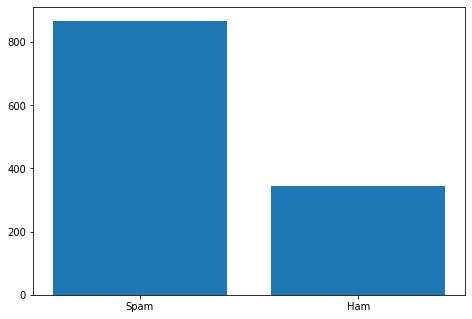

In [64]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categ = ['Spam', 'Ham']
cnt = [spams_webistes_cnt, emails_websites_cnt - spams_webistes_cnt]
ax.bar(categ,cnt)
plt.show()

In [65]:
website_int = []
for item in df['website']:
  website_int.append(float(item))

In [66]:
df['website'] = website_int

In [67]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

Observation: 75% of spam emails contain websites

Checking if exclaimation mark is a feature

In [68]:
print(df.loc[(df['text'].str.contains('!'))].loc[(df['spam'] == 0)].count)

<bound method DataFrame.count of                                                    text  spam  website
1371  Subject: faculty information sheet  mr . kamin...   0.0      0.0
1373  Subject: re : transition to research group - a...   0.0      0.0
1377  Subject: visiting enron may 4 th  dear vince ,...   0.0      0.0
1384  Subject: re : wharton tiger team # 3  melinda ...   0.0      0.0
1385  Subject: school teaching  hello vince ,  i sto...   0.0      0.0
...                                                 ...   ...      ...
6011  Subject: fw : fw : march 2001 invoice\r\ncharl...   0.0      0.0
6028  Subject: houston getaways\r\nhouston fare sale...   0.0      1.0
6031  Subject: re : 1601\r\nyes , that sounds great ...   0.0      0.0
6043  Subject: fw : please read . . don ' t delete\r...   0.0      1.0
6048  Subject: @ ect . enron . com email notificatio...   0.0      0.0

[611 rows x 3 columns]>


In [69]:
df["count_!"] = df['text'].str.count('!')

In [70]:
print(df.loc[(df['spam'] == 1)]["count_!"].mean())

2.028975265017668


In [71]:
print(df.loc[(df['spam'] == 0)]["count_!"].mean())

0.4005524861878453


Observation: the mean of exclaimation marks in spam emails is higher than in ham 

#**Data Preprocessing**

In [72]:
def preprocess(doc):
    doc = unidecode.unidecode(doc) # transliterates any unicode string into the closest possible representation in ascii text.
    doc = contractions.fix(doc) # expands contractions                   
    doc = re.sub('[\t\n]', ' ', doc) # remove newlines and tabs
    #doc = re.sub(r'https?://[^ ]+', '', doc)
    #doc = re.sub(r'www.[^ ]+', '', doc)
    doc = re.sub('[^A-Za-z]+', ' ', doc) # remove all characters other than alphabet
    doc = re.sub(' +', ' ', doc) # substitute any number of space with one space only
    doc = doc.strip().lower() # remove spaces from begining and end and lower the text
    doc = re.sub(" \d+", " ", doc) # remove integers
    return doc

In [73]:
# Apply preprocessing for data
df['processed'] = df['text'].apply(preprocess)

In [74]:
df.head

<bound method NDFrame.head of                                                    text  ...                                          processed
0     Subject: naturally irresistible your corporate...  ...  subject naturally irresistible your corporate ...
1     Subject: the stock trading gunslinger  fanny i...  ...  subject the stock trading gunslinger fanny is ...
2     Subject: unbelievable new homes made easy  im ...  ...  subject unbelievable new homes made easy i am ...
3     Subject: 4 color printing special  request add...  ...  subject color printing special request additio...
4     Subject: do not have money , get software cds ...  ...  subject do not have money get software cds fro...
...                                                 ...  ...                                                ...
6083  Subject: anomaly boys from 3881\r\nuosda apapr...  ...  subject anomaly boys from uosda apaproved mled...
6084  Subject: slutty milf wants to meet you\r\ntake...  ...  subject slut

Removing duplicsates after preprocessing

In [75]:
df['processed'].duplicated().sum()

141

In [76]:
df = df.drop_duplicates(['processed'])

In [77]:
df['processed'].duplicated().sum()

0

#**Data Segmentation and Stemming**

In [78]:
# Tokenizing the words using spaces
df['segmented'] = df['processed'].apply(lambda x: x.split()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Lemmatizing the words

Frequency Analysis Before Removing Stop Words

In [79]:
from nltk.corpus import wordnet
# Map pos tag from nltk library to characeters accepted by the wordnet Lemmatizer to understand word's POS 
def get_wordnet_pos(word): 
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [80]:
from nltk.stem import WordNetLemmatizer
# Lemmatize all words in a list of words using their POS
def lemmatizerHelper(words):
    lemmatizer = WordNetLemmatizer()
    l = []
    for w in words:
        l.append(lemmatizer.lemmatize(w , get_wordnet_pos(w)))
    return l

In [81]:
df['stemmed'] = df['segmented'].apply(lemmatizerHelper) # stemming the words

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

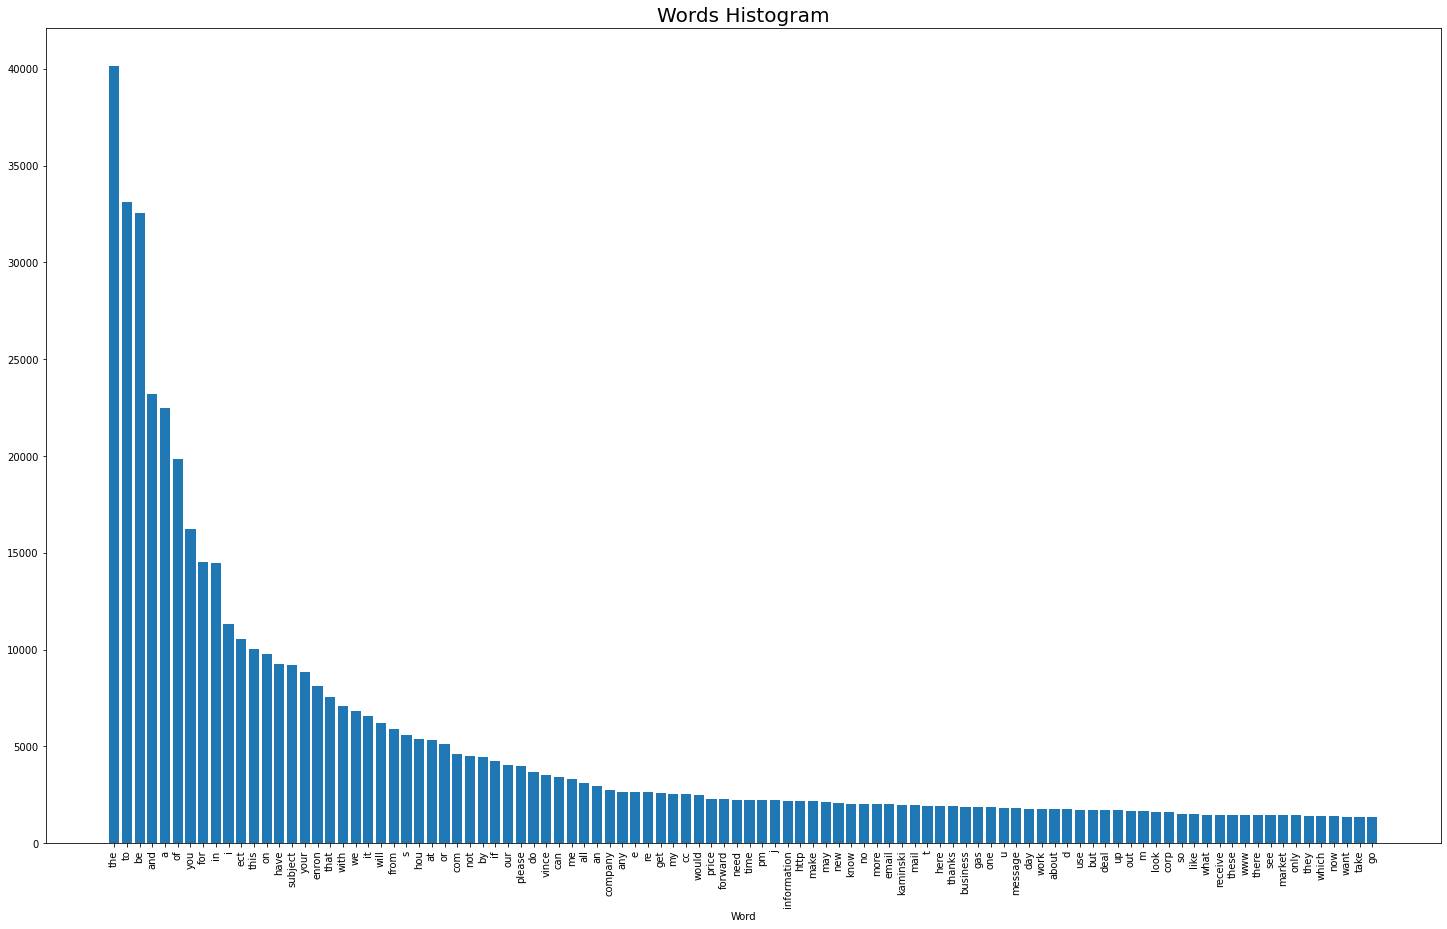

In [83]:
from nltk.probability import FreqDist

fdist = FreqDist()
for vec in df['stemmed']:
    for word in vec:
        fdist[word.lower()] += 1

highest = dict(fdist.most_common(100))

plt.figure(figsize=(25,15)) 
plt.title('Words Histogram', fontdict={'fontsize':20})
plt.xlabel('Word')
plt.bar(highest.keys(), highest.values())
plt.xticks(rotation=90)
plt.show()

Frequency Analysis After Removing Stop Words

In [84]:
from string import ascii_lowercase

stop_words = set(nltk.corpus.stopwords.words('english'))

# adding single characters to new_stop_words
for c in ascii_lowercase:
    stop_words.add(c)

In [85]:
df['stopRemoved'] = df['stemmed'].apply(lambda words: [word for word in words if word not in stop_words])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Frequency Analysis After Removing Stop Words

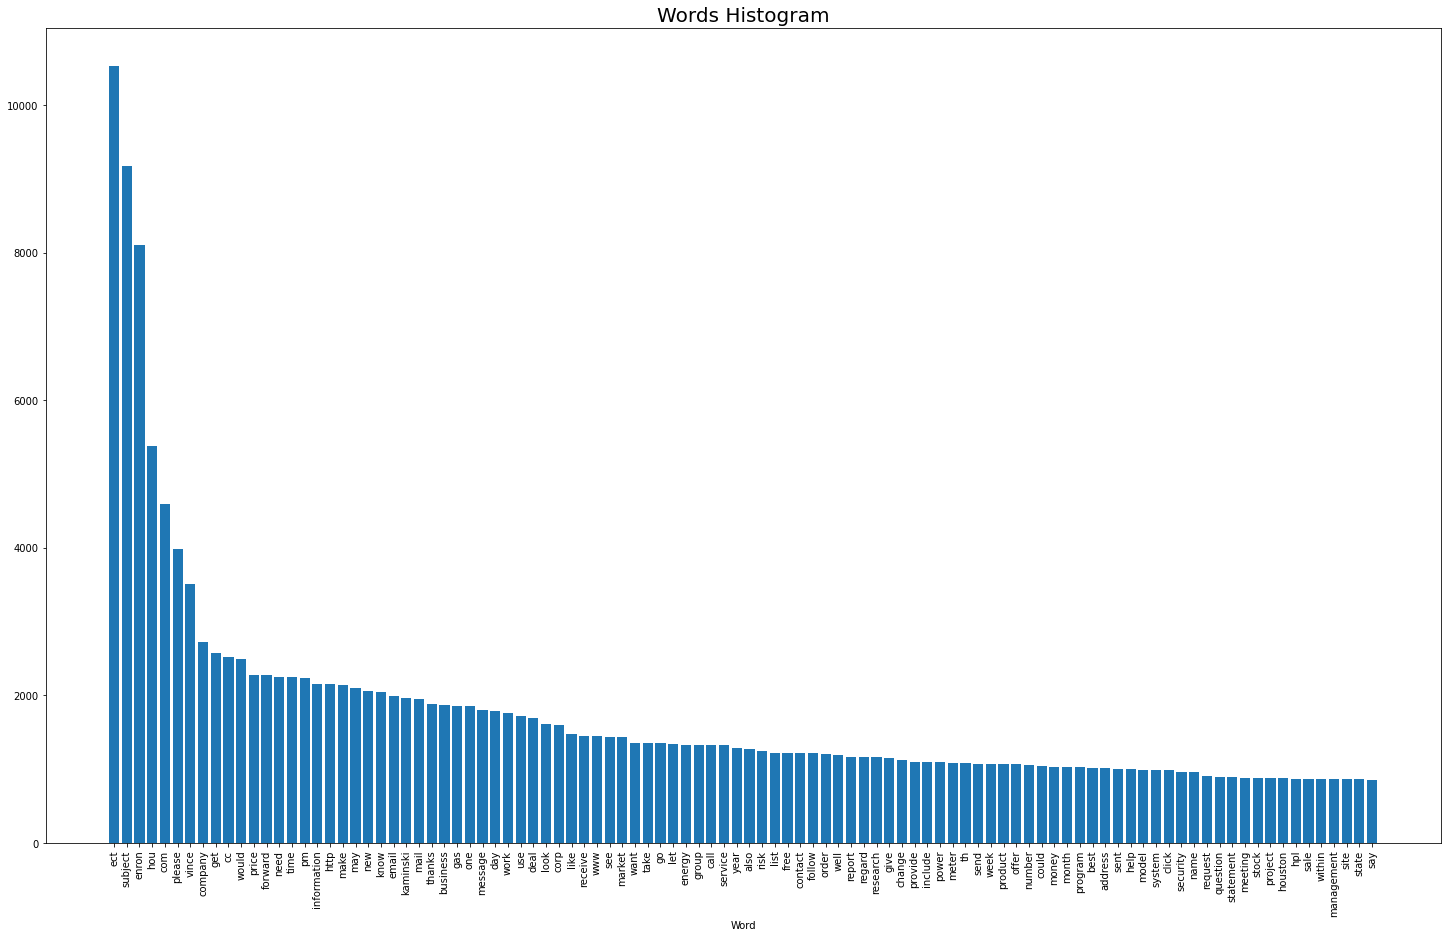

In [86]:
from nltk.probability import FreqDist

fdist = FreqDist()
for vec in df['stopRemoved']:
    for word in vec:
        fdist[word.lower()] += 1

higestStopRem = dict(fdist.most_common(100))

plt.figure(figsize=(25,15)) 
plt.title('Words Histogram', fontdict={'fontsize':20})
plt.xlabel('Word')
plt.bar(higestStopRem.keys(), higestStopRem.values())
plt.xticks(rotation=90)
plt.show()

In [87]:
# Number of unique words in the data
len(fdist)

50069

In [88]:
from statistics import *
# Mean and Median => The graph is right skewed
print('Mean:', mean(fdist.values()))
print('Median:', median(fdist.values()))

Mean: 14.18450538257205
Median: 1


Checking highest frequency words

In [89]:
print([x for x in fdist.keys() if fdist[x] > 2700])

['subject', 'company', 'com', 'please', 'ect', 'hou', 'vince', 'enron']


In [90]:
# Number of words with freq >2700
len([x for x in fdist.values() if x > 2700])

8

Checking least frequency words

In [91]:
print([x for x in fdist.keys() if fdist[x] < 5])

['gunslinger', 'fanny', 'muzo', 'colza', 'attainder', 'penultimate', 'esmark', 'perspicuous', 'ramble', 'segovia', 'slung', 'tanzania', 'chameleon', 'clothesman', 'libretto', 'chesapeake', 'waterway', 'hawthorn', 'chisel', 'morristown', 'clockwork', 'mcdougall', 'hepburn', 'einsteinian', 'sapling', 'boar', 'palfrey', 'inflexible', 'huzzah', 'pepperoni', 'bedtime', 'nameable', 'chronography', 'pirogue', 'albeit', 'dorcas', 'pittman', 'ramsey', 'goldengraphix', 'graphix', 'azusa', 'canyon', 'irwindale', 'tradgedies', 'comedy', 'nnews', 'medzonline', 'groundsel', 'felicitation', 'maceuticai', 'helter', 'shakedown', 'cosmopolitan', 'tosher', 'coadjutor', 'confidant', 'inexpiable', 'confide', 'ntiaiity', 'polite', 'allusion', 'devitalize', 'ogica', 'especia', 'heip', 'ocaies', 'nuciear', 'faciiities', 'deiiver', 'aiong', 'iquids', 'filiing', 'ocations', 'faciiity', 'enabie', 'evaiuate', 'empioyee', 'chemica', 'previousiy', 'vaiuable', 'fueis', 'truiy', 'stockhoider', 'fuily', 'speiled', 'tw

In [92]:
# Number of words with freq <5
len([x for x in fdist.values() if x < 5])

39445

Removing highest and least frequencies, final list of useful features

In [93]:
usefulWords = []
freq_useful = dict()
for word in fdist:
    if fdist[word] > 5 and fdist[word] < 2700 and len(word)>2:
        usefulWords.append(word)
        freq_useful[word] = fdist[word]
num_words = len(usefulWords)
print(len(usefulWords))

8898


Plotting

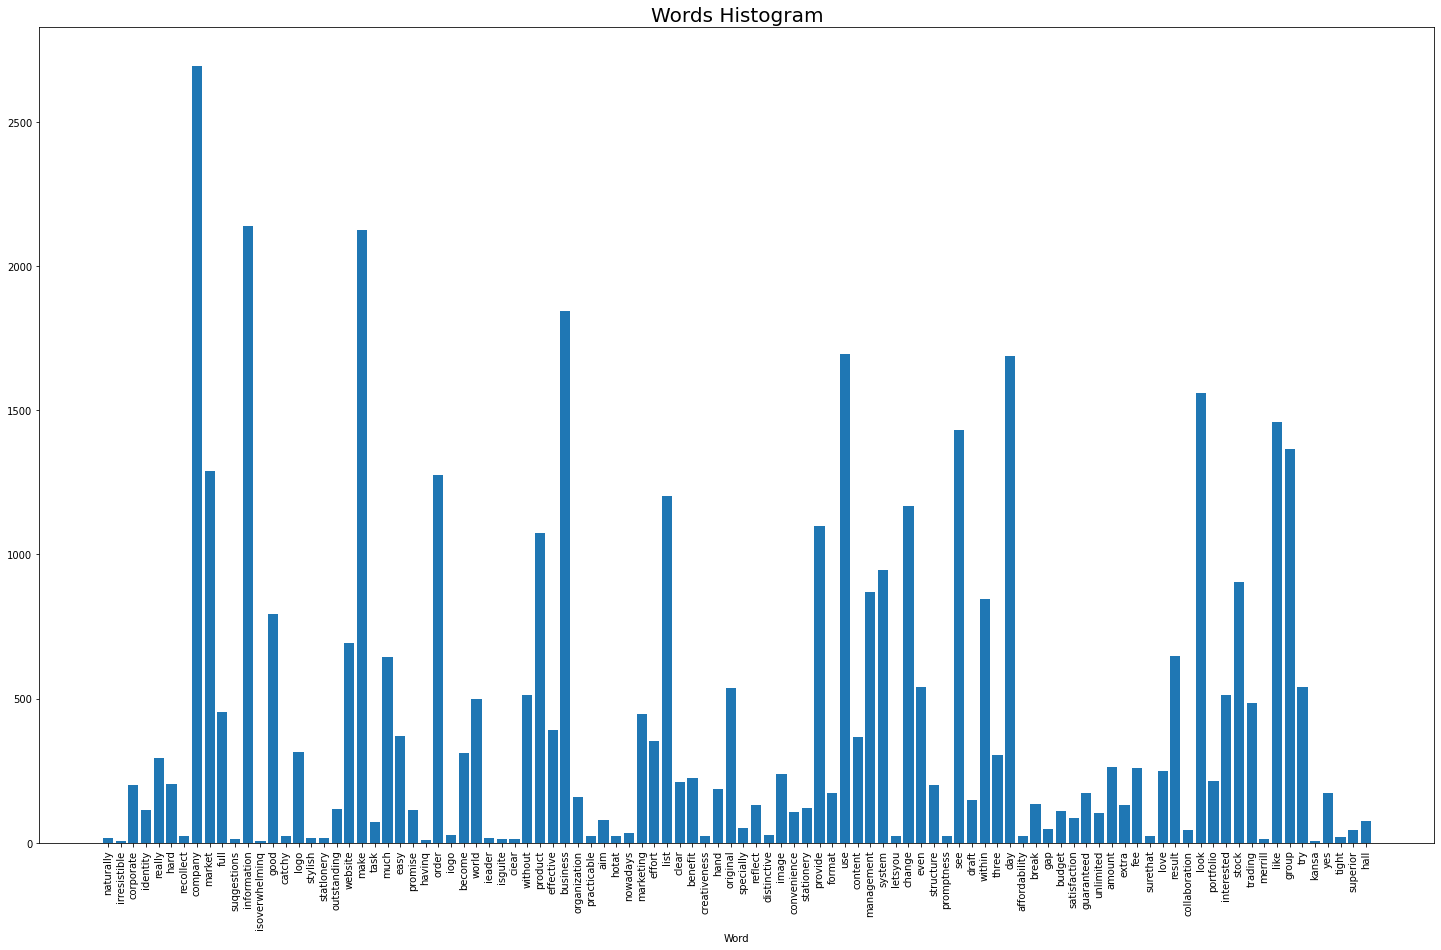

In [63]:
plt.figure(figsize=(25,15)) 
plt.title('Words Histogram', fontdict={'fontsize':20})
plt.xlabel('Word')
plt.bar(list(freq_useful.keys())[:100], list(freq_useful.values())[:100])
plt.xticks(rotation=90)
plt.show()

In [64]:
def isUseful(x):
    ll = []
    for word in x:
        if word in usefulWords:
            ll.append(word)
    return ll

In [65]:
df['cleaned'] = df['stopRemoved'].apply(isUseful)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
print(df['cleaned'].head)

<bound method NDFrame.head of 0       [naturally, irresistible, corporate, identity,...
1       [stock, trading, merrill, like, group, try, ka...
2       [unbelievable, new, home, make, easy, want, sh...
3       [color, printing, special, request, additional...
4       [money, get, software, software, compatibility...
                              ...                        
6083    [penny, stock, timing, nomad, international, i...
6084    [anomaly, boy, crack, virus, arena, martin, fa...
6085                                   [want, meet, take]
6086    [industrial, worksheet, august, activity, atta...
6087    [important, online, banking, alert, dear, valu...
Name: cleaned, Length: 5948, dtype: object>


In [67]:
df['cleaned'] = df['cleaned'].apply(lambda x: np.nan if len(x) == 0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Size before dropping empty values

In [68]:
df.shape

(5948, 9)

In [69]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Size After dropping empty

In [70]:
df.shape

(5942, 9)

In [71]:
df.reset_index()

,index,text,spam,website,count_!,processed,segmented,stemmed,stopRemoved,cleaned
0,0,Subject: naturally irresistible your corporate...,1.0,0.0,0,subject naturally irresistible your corporate ...,"[subject, naturally, irresistible, your, corpo...","[subject, naturally, irresistible, your, corpo...","[subject, naturally, irresistible, corporate, ...","[naturally, irresistible, corporate, identity,..."
1,1,Subject: the stock trading gunslinger fanny i...,1.0,0.0,0,subject the stock trading gunslinger fanny is ...,"[subject, the, stock, trading, gunslinger, fan...","[subject, the, stock, trading, gunslinger, fan...","[subject, stock, trading, gunslinger, fanny, m...","[stock, trading, merrill, like, group, try, ka..."
2,2,Subject: unbelievable new homes made easy im ...,1.0,0.0,0,subject unbelievable new homes made easy i am ...,"[subject, unbelievable, new, homes, made, easy...","[subject, unbelievable, new, home, make, easy,...","[subject, unbelievable, new, home, make, easy,...","[unbelievable, new, home, make, easy, want, sh..."
3,3,Subject: 4 color printing special request add...,1.0,0.0,2,subject color printing special request additio...,"[subject, color, printing, special, request, a...","[subject, color, printing, special, request, a...","[subject, color, printing, special, request, a...","[color, printing, special, request, additional..."
4,4,"Subject: do not have money , get software cds ...",1.0,0.0,1,subject do not have money get software cds fro...,"[subject, do, not, have, money, get, software,...","[subject, do, not, have, money, get, software,...","[subject, money, get, software, cd, software, ...","[money, get, software, software, compatibility..."
...,...,...,...,...,...,...,...,...,...,...
5937,6083,Subject: penny stocks are about timing\r\nnoma...,1.0,0.0,3,subject penny stocks are about timing nomad in...,"[subject, penny, stocks, are, about, timing, n...","[subject, penny, stock, be, about, timing, nom...","[subject, penny, stock, timing, nomad, interna...","[penny, stock, timing, nomad, international, i..."
5938,6084,Subject: anomaly boys from 3881\r\nuosda apapr...,1.0,0.0,0,subject anomaly boys from uosda apaproved mled...,"[subject, anomaly, boys, from, uosda, apaprove...","[subject, anomaly, boy, from, uosda, apaproved...","[subject, anomaly, boy, uosda, apaproved, mled...","[anomaly, boy, crack, virus, arena, martin, fa..."
5939,6085,Subject: slutty milf wants to meet you\r\ntake...,1.0,0.0,1,subject slutty milf wants to meet you take tha...,"[subject, slutty, milf, wants, to, meet, you, ...","[subject, slutty, milf, want, to, meet, you, t...","[subject, slutty, milf, want, meet, take, ilaa...","[want, meet, take]"
5940,6086,Subject: industrial worksheets for august 2000...,0.0,0.0,0,subject industrial worksheets for august activ...,"[subject, industrial, worksheets, for, august,...","[subject, industrial, worksheet, for, august, ...","[subject, industrial, worksheet, august, activ...","[industrial, worksheet, august, activity, atta..."


Adding Cleaned Text column

In [72]:
df['text_cleaned'] = df['cleaned'].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df = df.reset_index(drop=1)

In [74]:
df['text_cleaned'].head

<bound method NDFrame.head of 0       naturally irresistible corporate identity real...
1       stock trading merrill like group try kansa yes...
2       unbelievable new home make easy want show home...
3       color printing special request additional info...
4       money get software software compatibility grea...
                              ...                        
5937    penny stock timing nomad international inc ndi...
5938    anomaly boy crack virus arena martin familiar ...
5939                                       want meet take
5940    industrial worksheet august activity attach wo...
5941    important online banking alert dear value citi...
Name: text_cleaned, Length: 5942, dtype: object>

Counting the number of words after cleaning them

In [75]:
num_total_words = 0
for row in df.index:
  num_total_words = num_total_words + len(df.cleaned[row])
print(num_total_words)

554564


#**Tokenization using Keras**

Splitting the data into train and test

In [76]:
train_size = int(df.shape[0] * 0.8)

train_sentences = df.text_cleaned[:train_size]
train_labels = df.spam[:train_size]

test_sentences = df.text_cleaned[train_size:]
test_labels = df.spam[train_size:]

In [77]:
tokenizer = Tokenizer(num_words=num_total_words)
tokenizer.fit_on_texts(train_sentences)

In [78]:
word_index = tokenizer.word_index

Giving an index for each word

In [79]:
word_index

{'would': 1,
 'get': 2,
 'company': 3,
 'kaminski': 4,
 'time': 5,
 'make': 6,
 'information': 7,
 'need': 8,
 'forward': 9,
 'may': 10,
 'price': 11,
 'mail': 12,
 'know': 13,
 'business': 14,
 'email': 15,
 'new': 16,
 'http': 17,
 'work': 18,
 'one': 19,
 'thanks': 20,
 'use': 21,
 'message': 22,
 'day': 23,
 'look': 24,
 'receive': 25,
 'like': 26,
 'group': 27,
 'research': 28,
 'see': 29,
 'corp': 30,
 'year': 31,
 'market': 32,
 'take': 33,
 'let': 34,
 'gas': 35,
 'risk': 36,
 'also': 37,
 'want': 38,
 'www': 39,
 'order': 40,
 'regard': 41,
 'free': 42,
 'call': 43,
 'deal': 44,
 'service': 45,
 'energy': 46,
 'list': 47,
 'contact': 48,
 'follow': 49,
 'report': 50,
 'week': 51,
 'give': 52,
 'provide': 53,
 'program': 54,
 'send': 55,
 'power': 56,
 'well': 57,
 'best': 58,
 'offer': 59,
 'number': 60,
 'change': 61,
 'money': 62,
 'could': 63,
 'address': 64,
 'request': 65,
 'model': 66,
 'include': 67,
 'help': 68,
 'product': 69,
 'click': 70,
 'name': 71,
 'management':

In [80]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [81]:
train_sequences

[[3735,
  7520,
  521,
  917,
  343,
  613,
  2786,
  3,
  32,
  216,
  4088,
  7,
  6197,
  84,
  2885,
  312,
  3609,
  3894,
  1088,
  97,
  6,
  1420,
  115,
  273,
  896,
  5409,
  40,
  2712,
  3,
  333,
  201,
  3736,
  4358,
  5410,
  195,
  84,
  69,
  317,
  14,
  693,
  2787,
  1393,
  2948,
  2400,
  32,
  896,
  200,
  270,
  333,
  115,
  317,
  47,
  549,
  466,
  2886,
  587,
  6,
  168,
  312,
  1876,
  981,
  2788,
  3,
  583,
  1029,
  312,
  814,
  53,
  723,
  273,
  21,
  292,
  72,
  74,
  2949,
  61,
  97,
  292,
  164,
  500,
  2887,
  29,
  312,
  724,
  89,
  354,
  14,
  23,
  2888,
  200,
  856,
  6,
  1821,
  966,
  1224,
  635,
  53,
  1045,
  407,
  61,
  870,
  503,
  2950,
  455,
  138,
  1877,
  24,
  504,
  155],
 [99,
  185,
  4089,
  26,
  27,
  165,
  6782,
  621,
  3895,
  26,
  2199,
  165,
  1329,
  2562,
  621,
  6783,
  4090,
  2026,
  26,
  7521,
  165,
  3610,
  5411,
  621,
  2563,
  6784],
 [5412,
  16,
  124,
  6,
  273,
  38,
  227,
  2

Padding the emails in order to use them in RNN

In [82]:
max_length = 100

In [83]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [84]:
train_padded[0]

array([3735, 7520,  521,  917,  343,  613, 2786,    3,   32,  216, 4088,
          7, 6197,   84, 2885,  312, 3609, 3894, 1088,   97,    6, 1420,
        115,  273,  896, 5409,   40, 2712,    3,  333,  201, 3736, 4358,
       5410,  195,   84,   69,  317,   14,  693, 2787, 1393, 2948, 2400,
         32,  896,  200,  270,  333,  115,  317,   47,  549,  466, 2886,
        587,    6,  168,  312, 1876,  981, 2788,    3,  583, 1029,  312,
        814,   53,  723,  273,   21,  292,   72,   74, 2949,   61,   97,
        292,  164,  500, 2887,   29,  312,  724,   89,  354,   14,   23,
       2888,  200,  856,    6, 1821,  966, 1224,  635,   53, 1045,  407,
         61], dtype=int32)

Padding the test set according to the training data set

In [85]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [86]:
print(df.cleaned[0])
print(train_sequences[0])
print(test_sequences[0])

['naturally', 'irresistible', 'corporate', 'identity', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easy', 'promise', 'havinq', 'order', 'iogo', 'company', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'product', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'effort', 'become', 'much', 'effective', 'list', 'clear', 'benefit', 'creativeness', 'hand', 'make', 'original', 'logo', 'specially', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provide', 'format', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'draft', 'within', 'three', 'business', 'day', 'affordability', 'marketing', 'break', 'make', 'gap', 

In [87]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")
print(f"Shape of train {train_labels.shape}")
print(f"Shape of test {test_labels.shape}")

Shape of train (4753, 100)
Shape of test (1189, 100)
Shape of train (4753,)
Shape of test (1189,)


#**Sentiment Analysis**

In [88]:
from textblob import TextBlob

In [89]:
blob = TextBlob("Analytics Vidhya is a great platform to learn data science. \n It helps community through blogs, hackathons, discussions,etc.")
#print (blob)
print(blob.sentiment)

Sentiment(polarity=0.8, subjectivity=0.75)


Adding a polarity column to the dataframe

In [90]:
df['polarity'] = df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment[0])

In [91]:
df['polarity'].head

<bound method NDFrame.head of 0       0.344841
1       0.381429
2       0.069654
3       0.328571
4       0.633333
          ...   
5937    0.178281
5938    0.375000
5939    0.000000
5940   -0.033333
5941    0.018056
Name: polarity, Length: 5942, dtype: float64>

Adding a subjectivity column to the dataframe

In [92]:
df['subjectivity'] = df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment[1])

In [93]:
df['subjectivity'].head

<bound method NDFrame.head of 0       0.596561
1       0.668571
2       0.566147
3       0.535714
4       0.416667
          ...   
5937    0.507104
5938    0.500000
5939    0.000000
5940    0.833333
5941    0.408333
Name: subjectivity, Length: 5942, dtype: float64>

In [94]:
df.info

<bound method DataFrame.info of                                                    text  ...  subjectivity
0     Subject: naturally irresistible your corporate...  ...      0.596561
1     Subject: the stock trading gunslinger  fanny i...  ...      0.668571
2     Subject: unbelievable new homes made easy  im ...  ...      0.566147
3     Subject: 4 color printing special  request add...  ...      0.535714
4     Subject: do not have money , get software cds ...  ...      0.416667
...                                                 ...  ...           ...
5937  Subject: penny stocks are about timing\r\nnoma...  ...      0.507104
5938  Subject: anomaly boys from 3881\r\nuosda apapr...  ...      0.500000
5939  Subject: slutty milf wants to meet you\r\ntake...  ...      0.000000
5940  Subject: industrial worksheets for august 2000...  ...      0.833333
5941  Subject: important online banking alert\r\ndea...  ...      0.408333

[5942 rows x 12 columns]>

Splitting the new features into training and testing

In [95]:
train_size = int(df.shape[0] * 0.8)

polarity_tr = df.polarity[:train_size]
subjectivity_tr = df.subjectivity[:train_size]

polarity_ts = df.polarity[train_size:]
subjectivity_ts = df.subjectivity[train_size:]

In [96]:
print(len(train_padded))
print(len(polarity_tr))

4753
4753


#**Pickling the data in order to use them in different models**

In [97]:
print(df.columns)

Index(['text', 'spam', 'website', 'count_!', 'processed', 'segmented',
       'stemmed', 'stopRemoved', 'cleaned', 'text_cleaned', 'polarity',
       'subjectivity'],
      dtype='object')


In [98]:
train_size = int(df.shape[0] * 0.8)

website_tr = df.website[:train_size]
ex_count_tr = df['count_!'][:train_size]

website_ts = df.website[train_size:]
ex_count_ts = df['count_!'][train_size:]

Pickling training and testing data

In [99]:
pickle_train = open(dataset_dir + "/train_padded.pickle","wb")
pickle.dump(train_padded, pickle_train)
pickle_train.close()

pickle_trainY = open(dataset_dir+ "/train_labels.pickle","wb")
pickle.dump(train_labels, pickle_trainY)
pickle_trainY.close()

pickle_test = open(dataset_dir+ "/test_padded.pickle","wb")
pickle.dump(test_padded, pickle_test)
pickle_test.close()

pickle_testY = open(dataset_dir+ "/test_labels.pickle","wb")
pickle.dump(test_labels, pickle_testY)
pickle_testY.close()

Pickiling polarity and subjecivity features

In [100]:
train_subjectivity = open(dataset_dir+ "/train_subjectivity.pickle","wb")
pickle.dump(subjectivity_tr, train_subjectivity)
train_subjectivity.close()

train_polarity = open(dataset_dir+ "/train_polarity.pickle","wb")
pickle.dump(polarity_tr, train_polarity)
train_polarity.close()

test_subjectivity = open(dataset_dir+ "/test_subjectivity.pickle","wb")
pickle.dump(subjectivity_ts, test_subjectivity)
test_subjectivity.close()

test_polarity = open(dataset_dir+ "/test_polarity.pickle","wb")
pickle.dump(polarity_ts, test_polarity)
test_polarity.close()

Pickling the ! and website features

In [103]:
train_website = open(dataset_dir+ "/train_website.pickle","wb")
pickle.dump(website_tr, train_website)
train_website.close()

train_ex = open(dataset_dir+ "/train_ex.pickle","wb")
pickle.dump(ex_count_tr, train_ex)
train_ex.close()

test_website = open(dataset_dir+ "/test_website.pickle","wb")
pickle.dump(website_ts, test_website)
test_website.close()

test_ex = open(dataset_dir+ "/test_ex.pickle","wb")
pickle.dump(ex_count_ts, test_ex)
test_ex.close()